In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
# импорт данных
df_heart = pd.read_csv('../data/heart.csv')

In [3]:
# сразу же переименуем имена колонок
df_heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                    'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
                    'exr_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
                    'thalassemia', 'target']

In [4]:
# определим категориальные и числовые колонки
cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
            'exr_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']

num_cols = ['age', 'resting_blood_pressure', 'cholesterol', 
            'max_heart_rate_achieved','st_depression']

In [5]:
# получим общее описание
df_heart.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exr_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# получим более детальное описание с помощью ProfileReport
# pandas_profiling.ProfileReport(df_heart)

#### Рассмотрим распределние target

<AxesSubplot:>

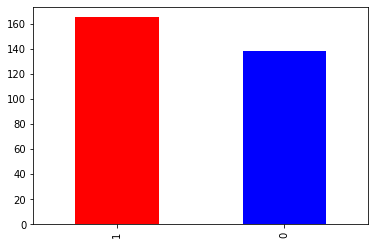

In [7]:
df_heart['target'].value_counts().plot(kind = 'bar', color=['red', 'blue'])

Видим, что патология присутствует у около 160 пациентов, а количество здоровых пациентов около 140. Данные более-менее сбалансированы

#### Рассмотрим связь между target и числовыми признаками

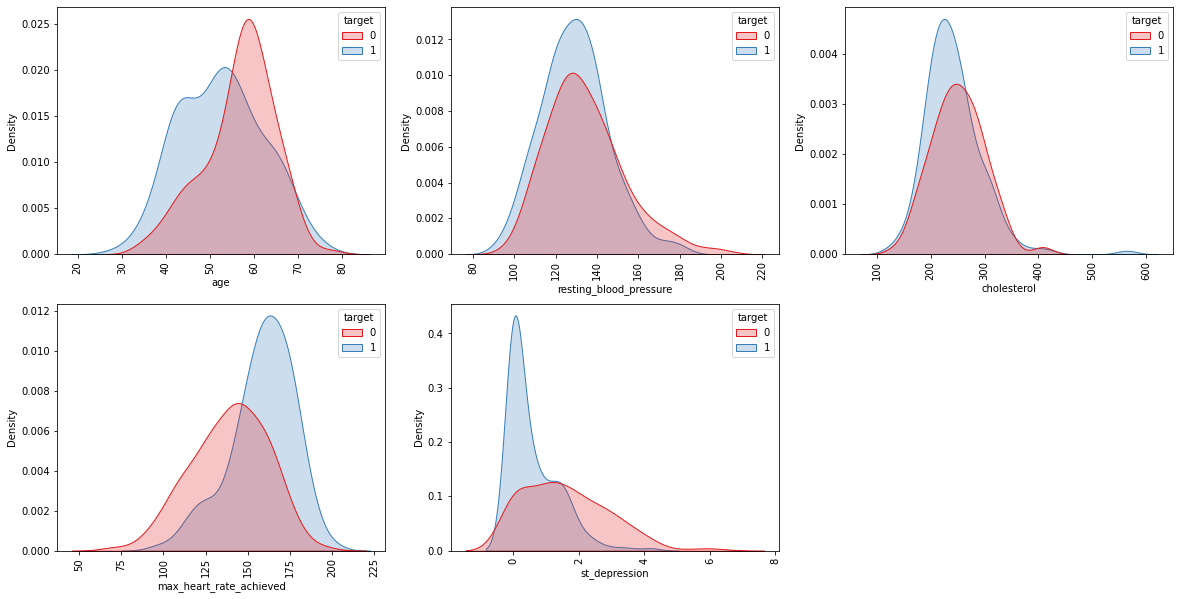

In [8]:
plt.figure(figsize=(20,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i + 1)
    sns.kdeplot(data=df_heart, x=col, hue='target', palette='Set1', fill=True)
    plt.xticks(rotation=90)

/home/azamat/miniconda3/envs/conda_work/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


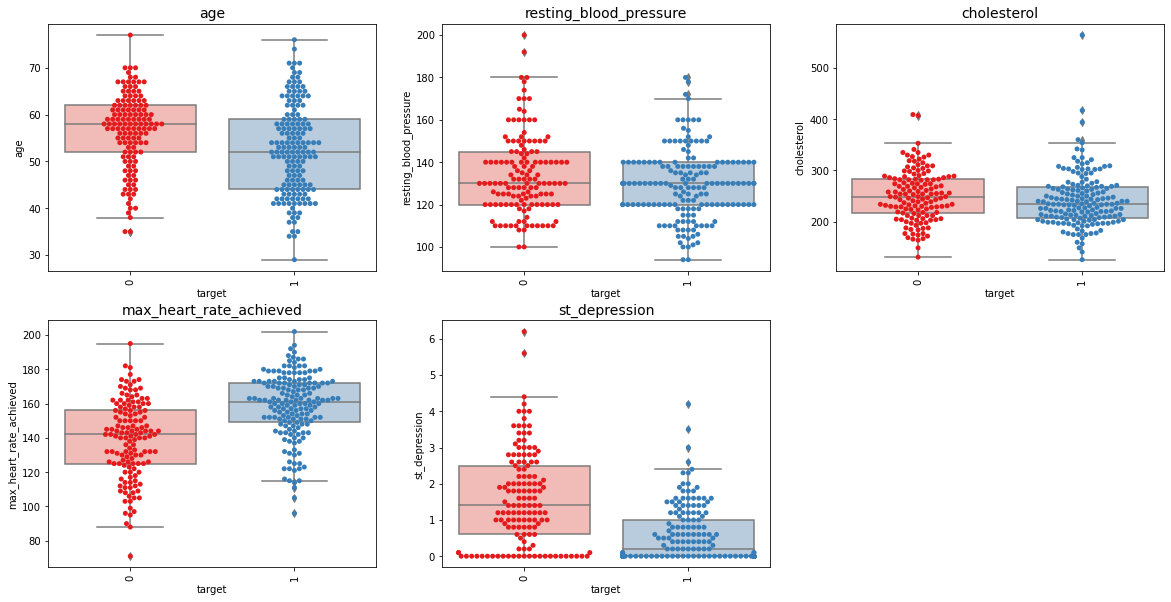

In [9]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_heart, x='target', y=col, palette='Pastel1')
    sns.swarmplot(data=df_heart, x='target', y=col, palette='Set1')
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize = 14)

#### Теперь рассмотрим распределение числовых признаков

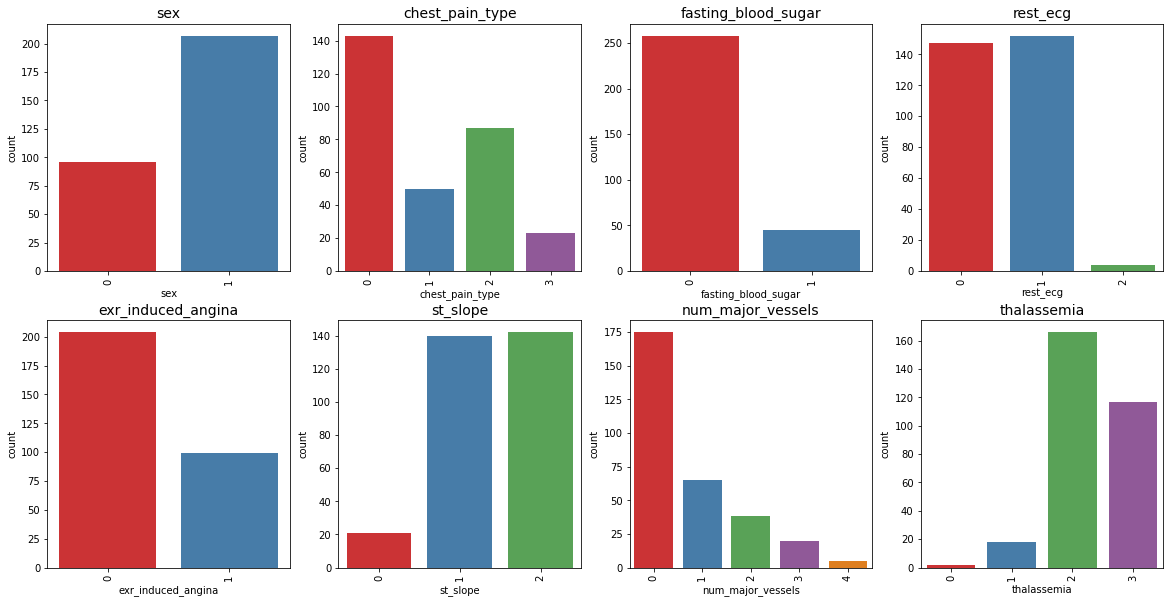

In [10]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=df_heart, x=col, palette='Set1')
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=14)

#### Посмотрим на корреляцию между всеми признаками

<AxesSubplot:>

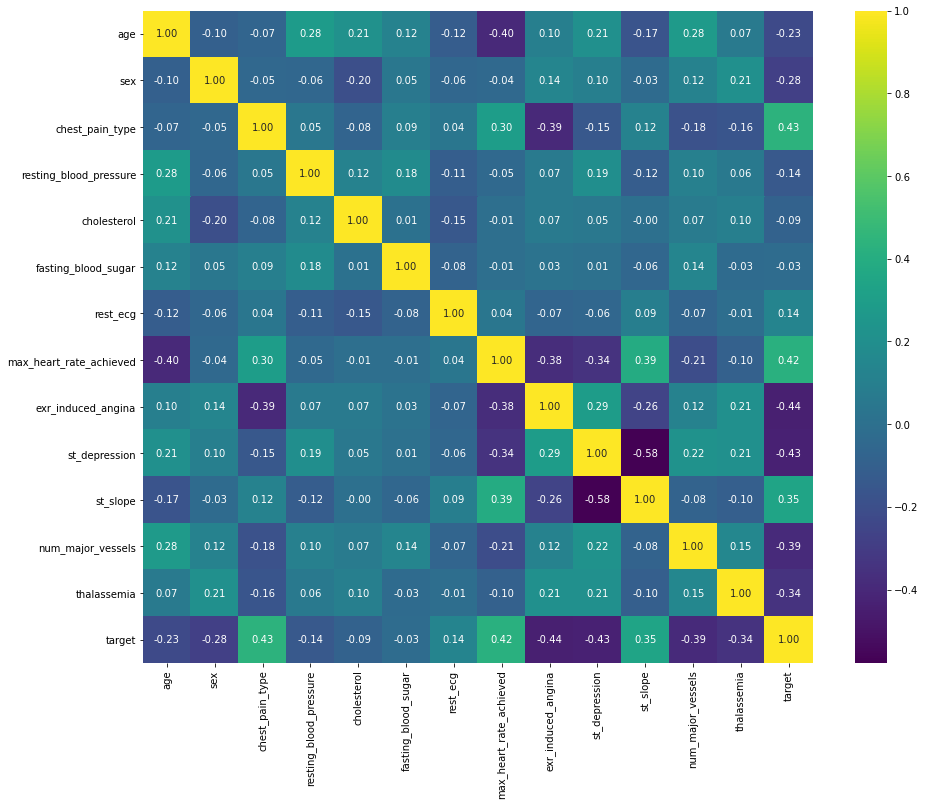

In [11]:
plt.figure(figsize = (15, 12))
sns.heatmap(df_heart.corr(), annot=True, fmt='.2f', cmap='viridis', cbar=True)